In [ ]:
## IDEAS
# logistic regression of if certain law firms are more likely to win

In [1]:
import pandas as pd
import csv
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline  
import pylab
import os
import glob
import statsmodels.api as sm

path = os.getcwd() 

In [2]:
files = glob.glob(path + "/data/Appeals/*.csv")
frame = pd.DataFrame()

list_ = []
for file_ in files:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
df = pd.concat(list_)

print "DONE CONCATINATING DATA"

DONE CONCATINATING DATA


##### number of appeals 2003-2015 and number of features

In [27]:
df.shape

(2608960, 24)

###### get 2015 year only, too

In [6]:
df15 = pd.read_csv(path + "/data/Appeals/appeals15.csv",index_col=None, header=0)

In [41]:
def print_statistics(data):
    '''
    Given a pandas dataframe, print dataframe statistics, correlation, and missing data.
    '''
    pd.set_option('display.width', 20)
    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    print '**** column names:  ', "\n", data.columns.values
    #print '**** top of the data: ', "\n",  data.head()
    #print '**** dataframe shape: ', "\n", data.shape
    print '**** statistics: ', "\n", data.describe(include='all')
    #print '**** MODE: ', "\n", data.mode()
    print '**** sum of null values by column: ', "\n", data.isnull().sum()
    print '**** correlation matrix: ', "\n", data.corr()

print_statistics(df)

1


#### Appeals per year

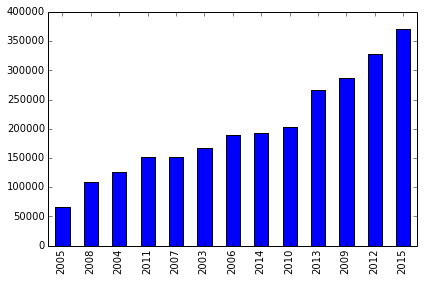

In [100]:
pd.value_counts(df["taxyear"], ascending=True).plot(kind = "bar")
plt.tight_layout()
plt.savefig(path + "/results/appeals-per-year.png")

In [47]:
print pd.value_counts(df["taxyear"])

2015    370183
2012    329005
2009    286505
2013    266278
2010    203698
2014    192981
2006    188727
2003    166562
2007    152477
2011    151169
2004    125317
2008    109387
2005     66671
dtype: int64


### Top 20 attorneys / firms by all appeals

In [102]:
print pd.value_counts(df["attorneytaxrep"])[:20]

ELLIOTT & ASSOCIATES                   171631
MICHAEL J ELLIOTT                      151740
FIELD & GOLDBERG,LLC                   108371
AMARI & LOCALLO                         98376
JAMES  A FIELD                          81554
WORSEK & VIHON P.C.                     79328
WORSEK & VIHON                          62165
CRANE & NORCROSS                        59621
O"KEEFE,LYONS,& HYNES                   57546
DAVID C DUNKIN                          50871
ARNSTEIN AND LEHR LLP                   50709
ROBERT M SARNOFF                        45629
KLAFTER & BURKE                         43296
LAW OFFICES OF TERRENCE KENNEDY,JR.     42573
SARNOFF & BACCASH                       36940
TERRENCE KENNEDY JR                     34272
PATRICK  J CULLERTON                    29536
WORSEK & VIHON LLP                      27022
GEORGE   N REVELIOTIS                   26869
MICHAEL A. GRIFFIN                      25983
dtype: int64


### Top attorneys for 2015

In [141]:
print pd.value_counts(df15["attorneytaxrep"])[:20]

MICHAEL J ELLIOTT       29579
TIMOTHY C JACOBS        24007
JAMES A. FIELD          19395
JAMES FIELD             17109
DAVID C DUNKIN          13964
AMARI AND LOCALLO       13298
ROBERT M SARNOFF        10856
ROBERT S VIHON-----      9389
TERRENCE KENNEDY JR      8763
MICHAEL J.  ELLIOTT      8612
DAVID C. DUNKIN          7292
JAMES R FORTCAMP         5838
STEVEN A SALZMAN         5553
EDWIN M WITTENSTEIN      5327
DANIEL G PIKARSKI        5318
ROBERT S. VIHON          4873
GEORGE REVELIOTIS        4834
TERRENCE KENNEDY, JR     4741
KLAFTER & BURKE          4677
KEVIN B. HYNES           4245
dtype: int64


### Top attorneys with most won cases
### Top attorneys with most failed cases

### 2015 total revision by win / lose of appeal

In [204]:
df15[df15["win"] == 0]["total_rev"].mean()

0.0

In [212]:
print df15[df15["win"] == 0]["total_rev"].describe()

print "win"
print df15[df15["win"] == 1]["total_rev"].describe()

count   69518.000
mean        0.000
std         0.000
min         0.000
25%         0.000
50%         0.000
75%         0.000
max         0.000
Name: total_rev, dtype: float64
win
count     300665.000
mean       18140.901
std       253224.580
min     -7287064.000
25%          817.000
50%         2476.000
75%         5423.000
max     38627854.000
Name: total_rev, dtype: float64


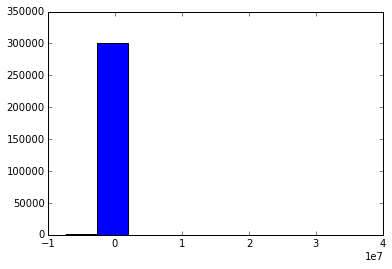

In [81]:
 plt.hist(df15[df15["win"] == 1]["total_rev"])
plt.savefig(path + "/results/distribution1_total_rev_year.png")

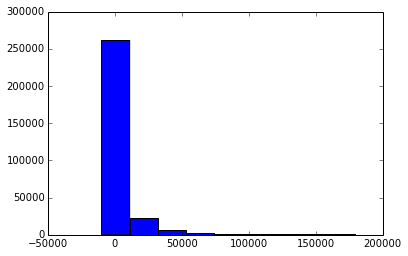

In [82]:

n, bins, patche = plt.hist(df15[(df15["total_rev"] < 200000) & (df15["win"] == 1)]["total_rev"], 10, range=[-10000, 200000])
plt.savefig(path + "/results/distribution2_total_rev_year.png")


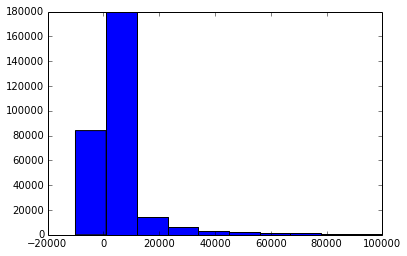

In [83]:

n, bins, patche = plt.hist(df15[(df15["total_rev"] < 100000) & (df15["win"] == 1)]["total_rev"], 10, range=[-10000, 100000])
plt.savefig(path + "/results/distribution3_total_rev_year.png")


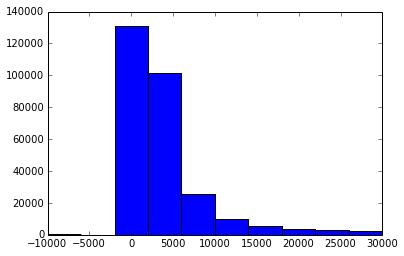

In [84]:
n, bins, patche = plt.hist(df15[(df15["total_rev"] < 30000) & (df15["win"] == 1)]["total_rev"], 10, range=[-10000, 30000])
plt.savefig(path + "/results/distribution4_total_rev_year.png")

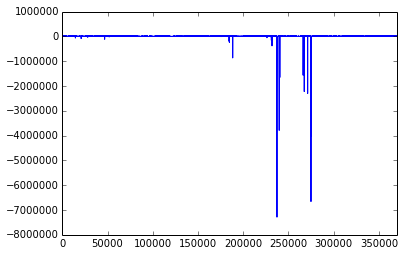

In [88]:
df15[(df15["total_rev"] < 10000) & (df15["win"] == 1)]["total_rev"].plot()

KeyError: 0

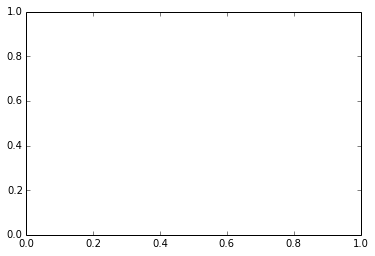

In [89]:
n, bins, patche = plt.hist(df15[(df15["total_rev"] < 10000) & (df15["win"] == 1)]["total_rev"], 10, range=[-1000, 10000])
plt.savefig(path + "/results/distribution5_total_rev_year.png")

[  4.00000000e+00   3.00315000e+05   2.63000000e+02   4.60000000e+01
   2.30000000e+01   7.00000000e+00   4.00000000e+00   0.00000000e+00
   1.00000000e+00   2.00000000e+00]
[ -7287064.   -2695572.2   1895919.6   6487411.4  11078903.2  15670395.
  20261886.8  24853378.6  29444870.4  34036362.2  38627854. ]
<a list of 10 Patch objects>


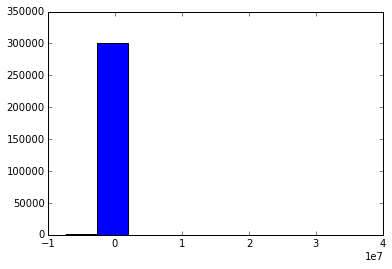

In [51]:
num_bins = 4

n, bins, patche = plt.hist(df15[df15["win"] == 1]["total_rev"])
print n
print bins
print patche
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.draw()

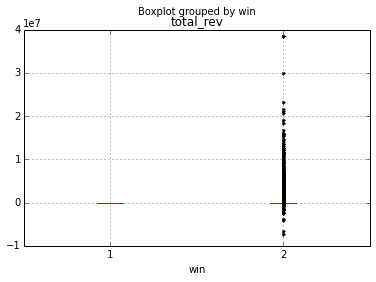

In [207]:
ax = df15.boxplot(column="total_rev", by="win", sym="k.")

#df15["log_total_rev"] =a np.log(df15["total_rev"])

In [164]:
df15[["prioir_av","proppose_av", "assr_final", "board_av", "win", "assr_rev", "total_rev"]]

,prioir_av,proppose_av,assr_final,board_av,win,assr_rev,total_rev
0,65249,65249,43780,43780,1,21469,21469
1,36046,36046,30798,20500,1,5248,15546
2,63366,73957,59453,59453,1,14504,14504
3,74800,74800,37247,37247,1,37553,37553
4,104568,126615,126615,126615,0,0,0
5,131230,187087,131229,131229,1,55858,55858
6,110912,158494,110912,110912,1,47582,47582
7,47812,47812,32665,32665,1,15147,15147
8,2490,3349,2490,2490,1,859,859
9,17726,34504,7660,7660,1,26844,26844


In [ ]:
### plot covariates to use for logistic regression / SVM
### ML if person won or not - logistic regression
#### what are the variables describin the passes? ass_win?
### compare prior av to propose av

### Average revision by year

### Average revision by year

### Wins by year

df[df["taxyear"] == 2015].shape



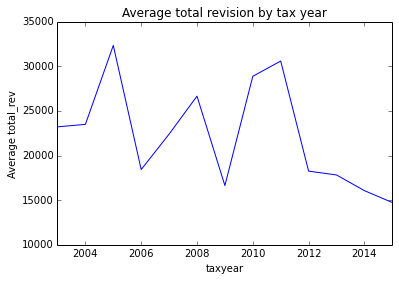

In [163]:
ax = df.groupby(['taxyear']).mean()['total_rev'].plot(title="Average total revision by tax year")
ax.set_ylabel("Average total_rev")
plt.savefig(path + "/results/avg_total_rev_year.png")

In [ ]:
#print pd.value_counts(df["win"]).groupby("taxyear")
#df["citya_name"].groupby("win")
#df.groupby(['taxyear']).mean()
df.groupby(['taxyear','win']).size().unstack().plot(kind = "bar")
#plt.tight_layout()
#plt.savefig(path + "/results/appeals-wins-by-year.png")

In [ ]:
### Logistic Regression
##### This includes data for all years - which may be an issue due to temporal differences

label = df['win']

features = df["proppose_av"]

logit = sm.Logit(label, features)
result = logit.fit()
print result.summary()